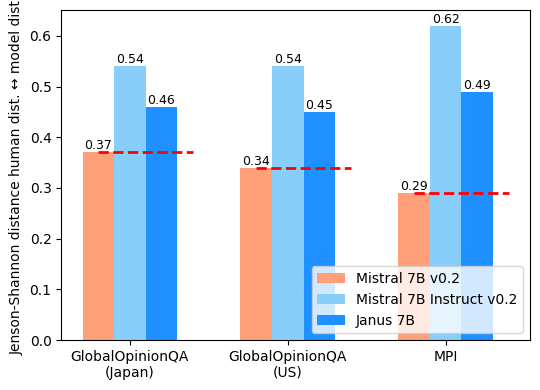

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Data
models = ['Mistral 7B v0.2', 'Mistral 7B Instruct v0.2', 'Janus 7B']
groups = ['GlobalOpinionQA\n(Japan)', 'GlobalOpinionQA\n(US)', 'MPI']
data = np.array([
    [0.37, 0.34, 0.29],
    [0.54, 0.54, 0.62],
    [0.46, 0.45, 0.49]
])

# Set up the plot
fig, ax = plt.subplots(figsize=(5.5, 4))

# Set width of bars and positions of the bars on the x-axis
bar_width = 0.2
r1 = np.arange(len(groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
bars1 = ax.bar(r1, data[0], color='lightsalmon', width=bar_width, label=models[0])
bars2 = ax.bar(r2, data[1], color='lightskyblue', width=bar_width, label=models[1])
bars3 = ax.bar(r3, data[2], color='dodgerblue', width=bar_width, label=models[2])

# Add horizontal lines and arrows with annotations
for i in range(len(groups)):
    # Horizontal line
    ax.hlines(y=data[0][i], xmin=r1[i], xmax=r3[i]+bar_width, color='red', linestyle='--', linewidth=2)
    
    # Arrows and annotations
    for j in [1, 2]:
        diff = data[j][i] - data[0][i]
        # ax.annotate('', xy=(r1[i]+j*bar_width+bar_width/2, data[j][i]), 
        #             xytext=(r1[i]+j*bar_width+bar_width/2, data[0][i]),
        #             arrowprops=dict(arrowstyle='->', color='black', linewidth=3))
        # ax.annotate(f'{diff:.2f}', 
        #             xy=(r1[i]+j*bar_width+bar_width/2, (data[j][i] + data[0][i])/2),
        #             xytext=(5, 0), textcoords='offset points',
        #             ha='left', va='center',
        #             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8))

# Customize the plot
ax.set_ylabel('Jenson-Shannon distance human dist. ↔ model dist.')
ax.set_xticks([r + bar_width for r in range(len(groups))])
ax.set_xticklabels(groups, fontsize=10)
ax.legend(fontsize=10, loc="lower right")

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.savefig("jsd.pdf", format='pdf', bbox_inches='tight')
plt.show()